### pyKRX

In [23]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr

start_date = pd.to_datetime('2018-01-01')
end_date = pd.to_datetime('2024-02-18')

data = pdr.DataReader("006740", "naver", start_date, end_date).astype(int)

In [26]:
data

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,1247,1281,1225,1250,295581
2018-01-03,1253,1299,1253,1269,270356
2018-01-04,1269,1296,1264,1278,326164
2018-01-05,1281,1294,1249,1260,178990
2018-01-08,1247,1256,1223,1252,319288
...,...,...,...,...,...
2024-02-08,2240,2300,2240,2270,930740
2024-02-13,2275,2345,2265,2320,741250
2024-02-14,2310,2320,2290,2305,402500


<Axes: xlabel='Date'>

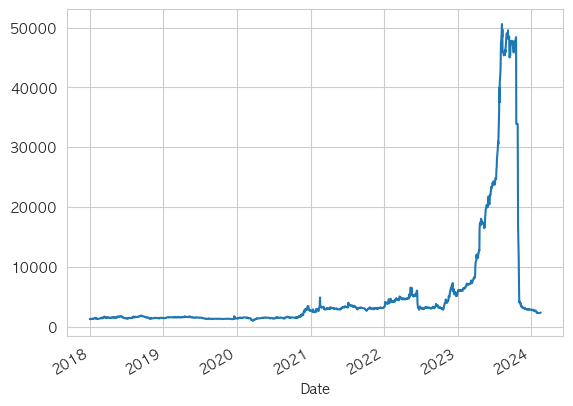

In [25]:
data.Close.plot()

In [35]:
import pykrx as pk

pk.stock.get_market_trading_volume_by_investor(
    fromdate = '2024-02-01', 
    todate = '2024-02-01',
    ticker = '006740'
)

,매도,매수,순매수
투자자구분,,,
금융투자,351,21,-330
보험,0,0,0
투신,0,0,0
사모,0,0,0
은행,0,0,0
기타금융,0,0,0
연기금 등,0,0,0
기관합계,351,21,-330
기타법인,0,20000,20000


In [36]:
import warnings
warnings.filterwarnings('ignore')

for i in data.index :
    data.loc[i, 'Buy_volume'] = pk.stock.get_market_trading_volume_by_investor(
        fromdate = i, 
        todate = i,
        ticker = '006740'
    )['매수'][:-1].sum()
    data.loc[i, 'Sell_volume'] = pk.stock.get_market_trading_volume_by_investor(
        fromdate = i, 
        todate = i,
        ticker = '006740'
    )['매도'][:-1].sum()

In [37]:
data

,Open,High,Low,Close,Volume,Buy_volume,Sell_volume
Date,,,,,,,
2018-01-02,1247,1281,1225,1250,295581,127150.0,127152.0
2018-01-03,1253,1299,1253,1269,270356,116299.0,116299.0
2018-01-04,1269,1296,1264,1278,326164,140306.0,140306.0
2018-01-05,1281,1294,1249,1260,178990,77100.0,76996.0
2018-01-08,1247,1256,1223,1252,319288,137348.0,137348.0
...,...,...,...,...,...,...,...
2024-02-08,2240,2300,2240,2270,930740,930748.0,930820.0
2024-02-13,2275,2345,2265,2320,741250,741309.0,744588.0
2024-02-14,2310,2320,2290,2305,402500,402503.0,412689.0


In [149]:
from FinancialMachineLearning.features.microstructure import *

In [117]:
ask = (data['Sell_volume'] / data['Volume']).mean()

In [160]:
pin = probability_of_informed_trading(
    data['Low'], data['High'], 
    window = 5,
    alpha = 0.5,
    delta = 0.5,
    mu = 0.5,
    bid = 1 - ask,
    ask = ask
)

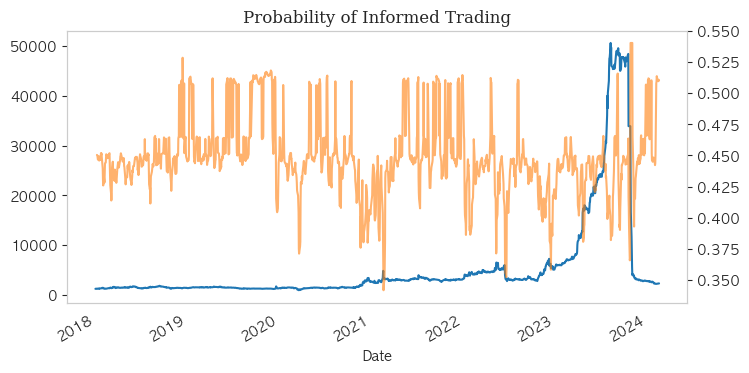

In [161]:
import matplotlib.pyplot as plt
data['Close'].plot(figsize = (8, 4), grid = False)
pin.plot(secondary_y = True, alpha = 0.6)
plt.title('Probability of Informed Trading', fontfamily = 'Serif')
plt.show()

In [214]:
market_depth = MarketDepth(np.log(data))

In [215]:
market_depth.fit_daily_data()

Date
2018-01-02    281.804201
2018-01-03    346.909454
2018-01-04    507.779775
2018-01-05    341.717678
2018-01-08    476.009322
                 ...    
2024-02-08    519.941043
2024-02-13    389.393341
2024-02-14    991.554773
2024-02-15    780.161362
2024-02-16    778.053099
Name: market_depth, Length: 1509, dtype: float64

<Axes: xlabel='Date'>

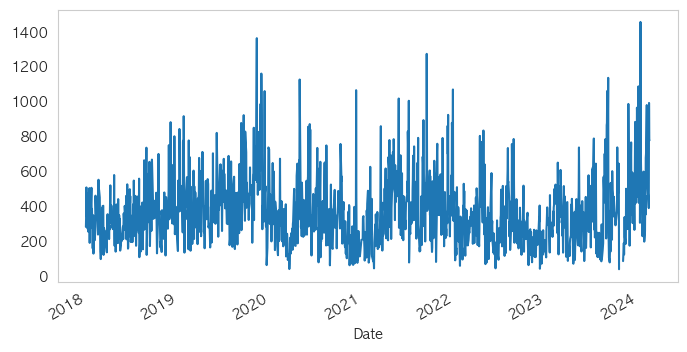

In [204]:
market_depth.market_depth.plot(
    grid = False, figsize = (8, 4)
)

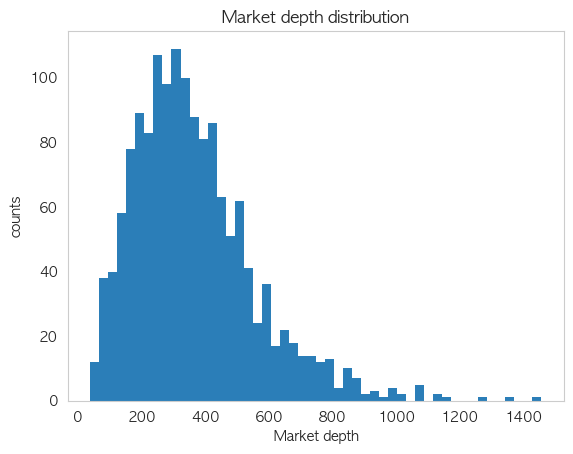

In [206]:
plt.hist(
    market_depth.market_depth[market_depth.market_depth != np.inf],
    bins = 50,
    edgecolor = 'none',
    alpha = 0.95
)
plt.grid(False)
plt.xlabel('Market depth')
plt.ylabel('counts')
plt.title('Market depth distribution')
plt.show()

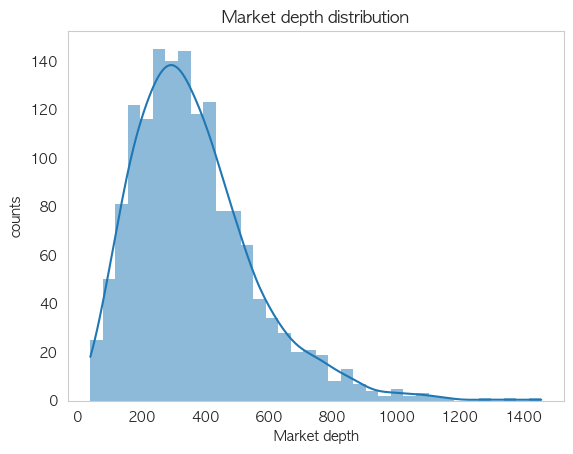

In [212]:
import seaborn as sns

sns.histplot(
    market_depth.market_depth[market_depth.market_depth != np.inf],
    edgecolor = 'none',
    kde = True
)
plt.grid(False)
plt.xlabel('Market depth')
plt.ylabel('counts')
plt.title('Market depth distribution')
plt.show()